# Basic LM

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.api as sm
from sklearn.datasets import load_boston


### 1. Housing price

In [3]:
df = pd.read_csv('C:/Users/Minkun/Desktop/classes_1/NanoDeg/1.Data_AN/L4/data/house_price_area_only.csv')
df.head()

,Unnamed: 0,price,area
0,0,598291,1188
1,1,1744259,3512
2,2,571669,1134
3,3,493675,1940
4,4,1101539,2208


In [4]:
#Before we fit our model, we need to ensure to add a column for intercept.(statmodel doesn't do this so..)
# OLS? 'ordinary least squared' then provide 'y' then a list of 'x' 
# then we fit and store in result

df['intercept'] = 1

lm = sm.OLS(df['price'], df[['intercept', 'area']])
results = lm.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.678
Model:                            OLS   Adj. R-squared:                  0.678
Method:                 Least Squares   F-statistic:                 1.269e+04
Date:                Mon, 25 Dec 2017   Prob (F-statistic):               0.00
Time:                        00:24:17   Log-Likelihood:                -84517.
No. Observations:                6028   AIC:                         1.690e+05
Df Residuals:                    6026   BIC:                         1.691e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
intercept   9587.8878   7637.479      1.255      0.209     -5384.303  2.46e+04
area         348.4664      3.093    112.662      0.000       342.403   354.530
==============================================================================
Omnibus:                      368.609   Durbin-Watson:                   2.007
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              349.279
Skew:                           0.534   Prob(JB):                     1.43e-76
Kurtosis:                       2.499   Cond. No.                     4.93e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.93e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### 2. Carat price

In [5]:
df = pd.read_csv('C:/Users/Minkun/Desktop/classes_1/NanoDeg/1.Data_AN/L4/data/carats.csv', header= None)
df.columns = ['carats', 'price']
df.head()

,carats,price
0,0.17,355
1,0.16,328
2,0.17,350
3,0.18,325
4,0.25,642


In [7]:
df['intercept'] = 1

lm = sm.OLS(df['price'], df[['intercept', 'carats']])
results = lm.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.978
Model:                            OLS   Adj. R-squared:                  0.978
Method:                 Least Squares   F-statistic:                     2070.
Date:                Mon, 25 Dec 2017   Prob (F-statistic):           6.75e-40
Time:                        00:25:23   Log-Likelihood:                -233.20
No. Observations:                  48   AIC:                             470.4
Df Residuals:                      46   BIC:                             474.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
intercept   -259.6259     17.319    -14.991      0.000      -294.487  -224.765
carats      3721.0249     81.786     45.497      0.000      3556.398  3885.651
==============================================================================
Omnibus:                        0.739   Durbin-Watson:                   1.994
Prob(Omnibus):                  0.691   Jarque-Bera (JB):                0.181
Skew:                           0.056   Prob(JB):                        0.913
Kurtosis:                       3.280   Cond. No.                         18.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

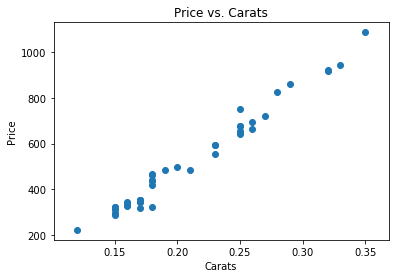

In [8]:
plt.scatter(df['carats'], df['price']);
plt.xlabel('Carats');
plt.ylabel('Price');
plt.title('Price vs. Carats');

### 3. Boston Housing price

In [2]:
boston_data = load_boston()
df = pd.DataFrame()
df['MedianHomePrice'] = boston_data.target
df2 = pd.DataFrame(boston_data.data)
df['CrimePerCapita'] = df2.iloc[:,0];
df.head()

,MedianHomePrice,CrimePerCapita
0,24.0,0.00632
1,21.6,0.02731
2,34.7,0.02729
3,33.4,0.03237
4,36.2,0.06905


The Boston housing data is a built in dataset in the sklearn library of python. You will be using two of the variables from this dataset, which are stored in df. The median home price in thousands of dollars and the crime per capita in the area of the home are shown above.

In [3]:
df['intercept'] = 1

lm = sm.OLS(df['MedianHomePrice'], df[['intercept', 'CrimePerCapita']])
results = lm.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        MedianHomePrice   R-squared:                       0.149
Model:                            OLS   Adj. R-squared:                  0.147
Method:                 Least Squares   F-statistic:                     88.15
Date:                Mon, 01 Jan 2018   Prob (F-statistic):           2.08e-19
Time:                        18:55:45   Log-Likelihood:                -1799.5
No. Observations:                 506   AIC:                             3603.
Df Residuals:                     504   BIC:                             3611.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
intercept         24.0162      0.409     58.676      0.000      23.212      24.820
CrimePerCapita    -0.4128      0.044     -9.389      0.000      -0.499      -0.326
==============================================================================
Omnibus:                      138.965   Durbin-Watson:                   0.712
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              292.343
Skew:                           1.483   Prob(JB):                     3.30e-64
Kurtosis:                       5.251   Cond. No.                         10.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

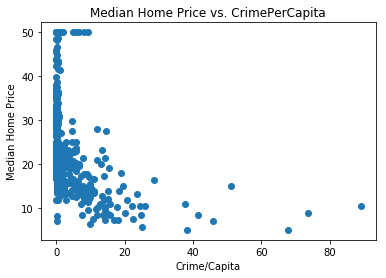

In [4]:
plt.scatter(df['CrimePerCapita'], df['MedianHomePrice']);
plt.xlabel('Crime/Capita');
plt.ylabel('Median Home Price');
plt.title('Median Home Price vs. CrimePerCapita');

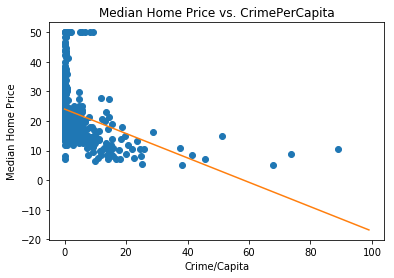

In [5]:
## To show the line that was fit I used the following code from 
## https://plot.ly/matplotlib/linear-fits/
## It isn't the greatest fit... but it isn't awful either


import plotly.plotly as py
import plotly.graph_objs as go

# MatPlotlib
import matplotlib.pyplot as plt
from matplotlib import pylab

# Scientific libraries
from numpy import arange,array,ones
from scipy import stats


xi = arange(0,100)
A = array([ xi, ones(100)])

# (Almost) linear sequence
y = df['MedianHomePrice']
x = df['CrimePerCapita']

# Generated linear fit
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
line = slope*xi+intercept

plt.plot(x,y,'o', xi, line);
plt.xlabel('Crime/Capita');
plt.ylabel('Median Home Price');
pylab.title('Median Home Price vs. CrimePerCapita');